In [1]:
import pandas as pd
import csv
import sys

In [4]:
new_limit = sys.maxsize
csv.field_size_limit(new_limit)
df = pd.read_csv('data/works_ifto.csv', encoding='utf8', engine='python')

In [9]:
print(list(df.columns))

['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'language', 'type', 'type_crossref', 'indexed_in', 'institution_assertions', 'countries_distinct_count', 'institutions_distinct_count', 'corresponding_author_ids', 'corresponding_institution_ids', 'apc_paid', 'fwci', 'has_fulltext', 'fulltext_origin', 'cited_by_count', 'is_retracted', 'is_paratext', 'locations_count', 'best_oa_location', 'datasets', 'versions', 'referenced_works_count', 'referenced_works', 'related_works', 'cited_by_api_url', 'updated_date', 'created_date', 'ids.openalex', 'ids.doi', 'ids.mag', 'primary_location.is_oa', 'primary_location.landing_page_url', 'primary_location.pdf_url', 'primary_location.source.id', 'primary_location.source.display_name', 'primary_location.source.issn_l', 'primary_location.source.issn', 'primary_location.source.is_oa', 'primary_location.source.is_in_doaj', 'primary_location.source.is_indexed_in_scopus', 'primary_location.source.is_core', 'primary_location.sourc

In [ ]:
df['institution_assertions'][0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2082   NaN
2083   NaN
2084   NaN
2085   NaN
2086   NaN
Name: institution_assertions, Length: 2087, dtype: float64

In [2]:
import matplotlib_venn

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


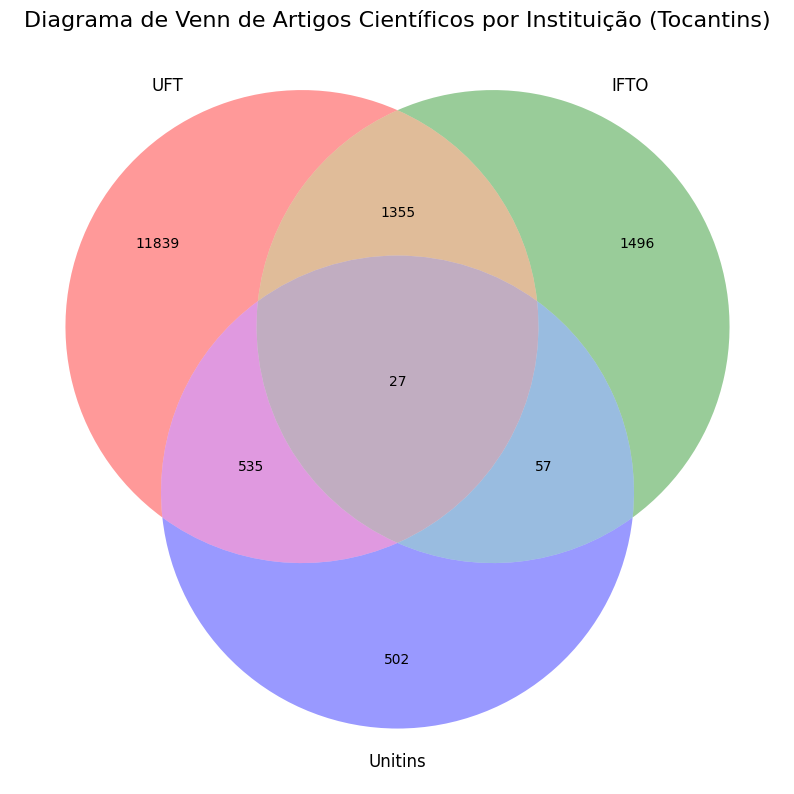

In [5]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Dados fornecidos pelo usuário
data = {
    "target_institution_analysis": {
        "exclusive_papers_per_institution": {
            "Universidade Federal do Tocantins": 11839,
            "Instituto Federal do Tocantins": 1496,
            "Universidade do Tocantins": 1355,
            "Centro Universitário Luterano de Palmas": 191,
            "Universidade Federal do Norte do Tocantins": 9
        },
        "all_present_papers": 0,
        "combinations_present_papers": {
            "Centro Universitário Luterano de Palmas, Universidade Federal do Tocantins": 86,
            "Universidade Federal do Tocantins, Universidade do Tocantins": 562,
            "Universidade Federal do Norte do Tocantins, Universidade Federal do Tocantins": 549,
            "Instituto Federal do Tocantins, Universidade Federal do Tocantins": 529,
            "Instituto Federal do Tocantins, Universidade do Tocantins": 84,
            "Instituto Federal do Tocantins, Universidade Federal do Tocantins, Universidade do Tocantins": 27,
            "Instituto Federal do Tocantins, Universidade Federal do Norte do Tocantins": 26,
            "Instituto Federal do Tocantins, Universidade Federal do Norte do Tocantins, Universidade Federal do Tocantins": 26,
            "Centro Universitário Luterano de Palmas, Universidade do Tocantins": 19,
            "Universidade Federal do Norte do Tocantins, Universidade do Tocantins": 13,
            "Universidade Federal do Norte do Tocantins, Universidade Federal do Tocantins, Universidade do Tocantins": 13,
            "Centro Universitário Luterano de Palmas, Universidade Federal do Tocantins, Universidade do Tocantins": 10,
            "Centro Universitário Luterano de Palmas, Instituto Federal do Tocantins": 12,
            "Centro Universitário Luterano de Palmas, Instituto Federal do Tocantins, Universidade Federal do Tocantins": 7,
            "Centro Universitário Luterano de Palmas, Universidade Federal do Norte do Tocantins": 1,
            "Centro Universitário Luterano de Palmas, Universidade Federal do Norte do Tocantins, Universidade Federal do Tocantins": 1
        }
    }
}

# Extrair dados relevantes para UFT, IFTO e Unitins
exclusive_papers = data["target_institution_analysis"]["exclusive_papers_per_institution"]
combinations_papers = data["target_institution_analysis"]["combinations_present_papers"]

# Definir nomes das instituições para clareza
UFT_name = "Universidade Federal do Tocantins"
IFTO_name = "Instituto Federal do Tocantins"
UNITINS_name = "Universidade do Tocantins"

# Obter contagens exclusivas
UFT_exclusive = exclusive_papers.get(UFT_name, 0)
IFTO_exclusive = exclusive_papers.get(IFTO_name, 0)
UNITINS_exclusive = exclusive_papers.get(UNITINS_name, 0)

# Função auxiliar para obter contagens de combinação, verificando todas as permutações
def get_combination_count(comb_dict, inst1, inst2):
    return comb_dict.get(f"{inst1}, {inst2}", comb_dict.get(f"{inst2}, {inst1}", 0))

def get_triple_combination_count(comb_dict, inst1, inst2, inst3):
    # Verifica todas as 6 permutações para a combinação tripla
    permutations = [
        f"{inst1}, {inst2}, {inst3}", f"{inst1}, {inst3}, {inst2}",
        f"{inst2}, {inst1}, {inst3}", f"{inst2}, {inst3}, {inst1}",
        f"{inst3}, {inst1}, {inst2}", f"{inst3}, {inst2}, {inst1}"
    ]
    for perm in permutations:
        if perm in comb_dict:
            return comb_dict[perm]
    return 0

UFT_IFTO_UNITINS_overlap = get_triple_combination_count(combinations_papers, UFT_name, IFTO_name, UNITINS_name)

UFT_UNITINS_overlap_total = get_combination_count(combinations_papers, UFT_name, UNITINS_name)
IFTO_UFT_overlap_total = get_combination_count(combinations_papers, IFTO_name, UFT_name)
IFTO_UNITINS_overlap_total = get_combination_count(combinations_papers, IFTO_name, UNITINS_name)

# Calcular as regiões específicas para o diagrama de Venn
# A = UFT, B = IFTO, C = Unitins

# Apenas A (UFT exclusivo)
a_only = UFT_exclusive

# Apenas B (IFTO exclusivo)
b_only = IFTO_exclusive

# Apenas C (Unitins exclusivo)
c_only = UNITINS_exclusive

# AB (UFT e IFTO, não Unitins)
ab = IFTO_UFT_overlap_total - UFT_IFTO_UNITINS_overlap

# AC (UFT e Unitins, não IFTO)
ac = UFT_UNITINS_overlap_total - UFT_IFTO_UNITINS_overlap

# BC (IFTO e Unitins, não UFT)
bc = IFTO_UNITINS_overlap_total - UFT_IFTO_UNITINS_overlap

# ABC (UFT, IFTO e Unitins)
abc = UFT_IFTO_UNITINS_overlap

# Criar o diagrama de Venn
plt.figure(figsize=(10, 10)) # Ajustar tamanho da figura para melhor visualização

# Usar venn3_unweighted para círculos de tamanhos iguais e para rotular os conjuntos
# A ordem dos valores corresponde a (100, 010, 001, 110, 101, 011, 111)
# (A, B, C, AB, AC, BC, ABC)
venn3_unweighted(
    subsets=(a_only, b_only, c_only, ab, ac, bc, abc),
    set_labels=('UFT', 'IFTO', 'Unitins')
)

plt.title('Diagrama de Venn de Artigos Científicos por Instituição (Tocantins)', fontsize=16)

# Salvar o gráfico como uma imagem de alta qualidade
plt.savefig('venn_diagram_uft_ifto_unitins.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

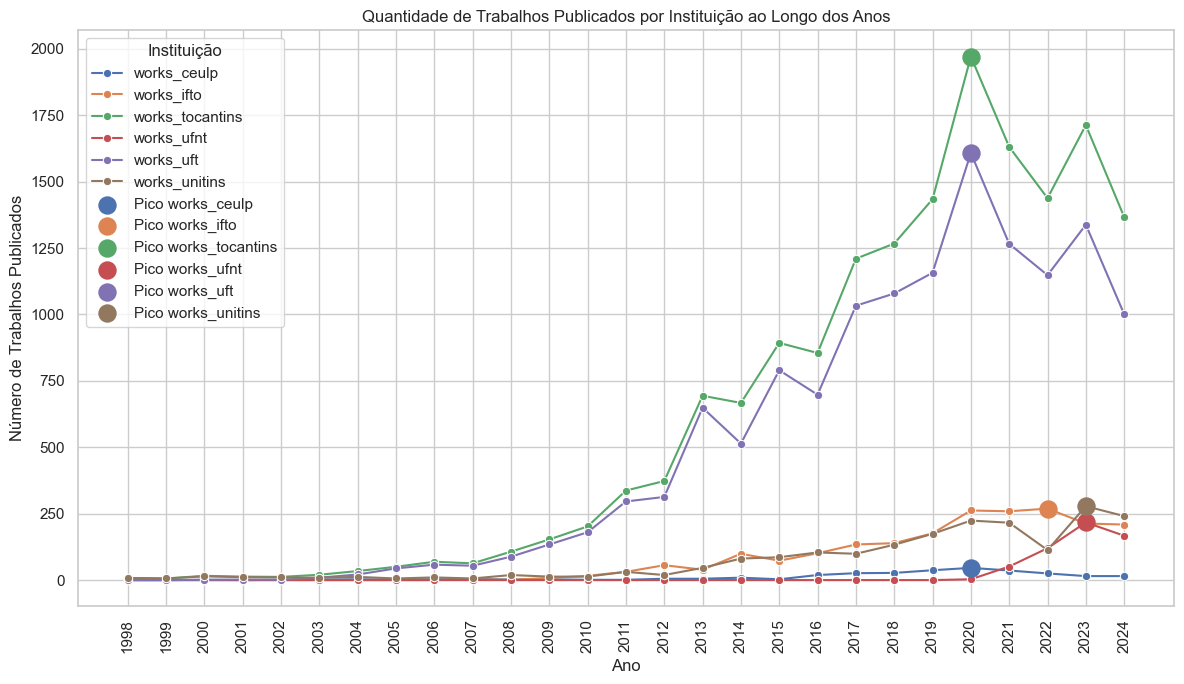

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Emulating opening a JSON file
# In a real scenario, you would use:
with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data).transpose()

# Ensure years are integers and reset index
df.columns = df.columns.astype(int)
df = df.reset_index().rename(columns={'index': 'Institution'})

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='Institution', var_name='Year', value_name='Works')

# Identify the peak for each institution
peak_data = df_melted.loc[df_melted.groupby('Institution')['Works'].idxmax()]

# Set a seaborn style
sns.set_theme(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(12, 7))
line_plot = sns.lineplot(data=df_melted, x='Year', y='Works', hue='Institution', marker='o', errorbar=None)

# Add markers for the peaks
for index, row in peak_data.iterrows():
    institution_color = line_plot.get_lines()[df_melted['Institution'].unique().tolist().index(row['Institution'])].get_color()
    plt.scatter(row['Year'], row['Works'], color=institution_color, s=150, zorder=5, label=f"Pico {row['Institution']}")

# Customize the plot
plt.xlabel('Ano')
plt.ylabel('Número de Trabalhos Publicados')
plt.title('Quantidade de Trabalhos Publicados por Instituição ao Longo dos Anos')

# Show all years on the x-axis
years = sorted(df_melted['Year'].unique())
plt.xticks(years, rotation=90)

plt.legend(title='Instituição')
plt.tight_layout()
plt.show()

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

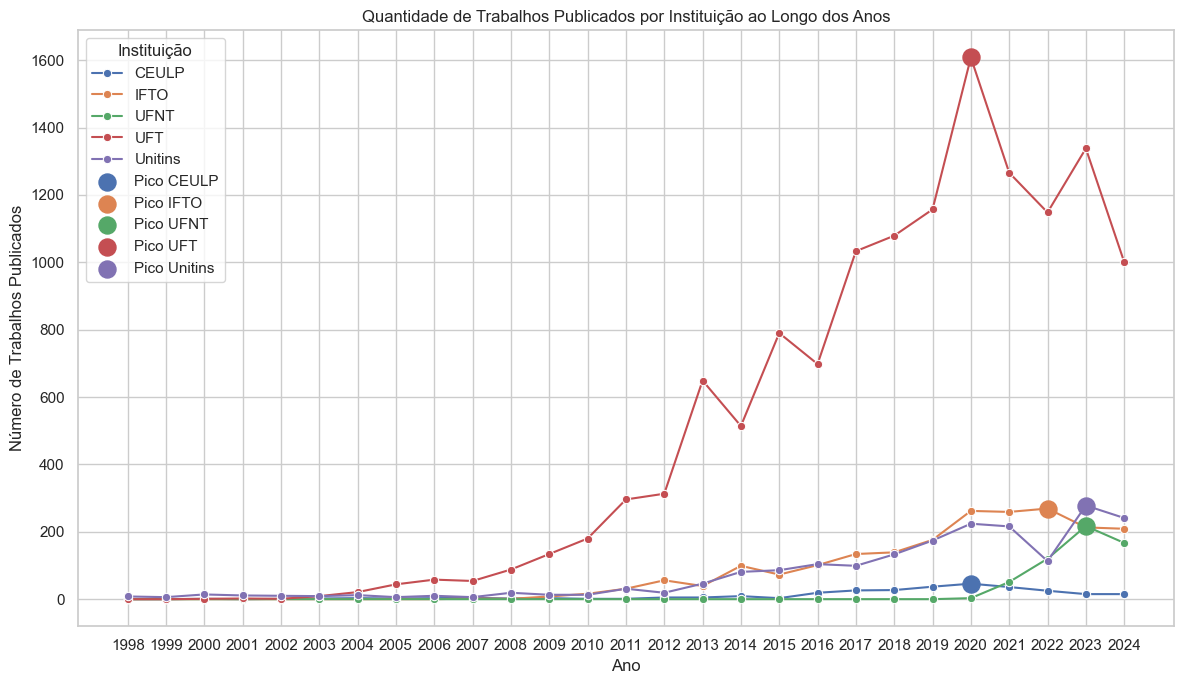

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Emulating opening a JSON file
# In a real scenario, you would use:
with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)

# --- Funcionalidade: Adicionar uma nova instituição (Exemplo) ---
# Se você quiser adicionar programaticamente, o ideal é ter os dados em mãos.
# Este é um exemplo de como seria se você tivesse os dados para uma nova instituição.
# Você precisaria ajustar os valores dos anos conforme a sua necessidade.
# nova_instituicao_dados = {
#     "Nova Instituicao Exemplo": {
#         "2018": 10,
#         "2019": 25,
#         "2020": 40,
#         "2021": 30,
#         "2022": 50,
#         "2023": 45,
#         "2024": 60
#     }
# }
# data.update(nova_instituicao_dados)
# -----------------------------------------------------------------

# Convert the data to a DataFrame
df = pd.DataFrame(data).transpose()

# Ensure years are integers and reset index
df.columns = df.columns.astype(int)
df = df.reset_index().rename(columns={'index': 'Institution'})



# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='Institution', var_name='Year', value_name='Works')

# Identify the peak for each institution
peak_data = df_melted.loc[df_melted.groupby('Institution')['Works'].idxmax()]

# Set a seaborn style
sns.set_theme(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(12, 7))
line_plot = sns.lineplot(data=df_melted, x='Year', y='Works', hue='Institution', marker='o', errorbar=None)

# Add markers for the peaks
for index, row in peak_data.iterrows():
    # Garantir que a instituição ainda exista após a exclusão
    if row['Institution'] in df_melted['Institution'].unique():
        institution_color = line_plot.get_lines()[df_melted['Institution'].unique().tolist().index(row['Institution'])].get_color()
        plt.scatter(row['Year'], row['Works'], color=institution_color, s=150, zorder=5, label=f"Pico {row['Institution']}")

# Customize the plot
plt.xlabel('Ano')
plt.ylabel('Número de Trabalhos Publicados')
plt.title('Quantidade de Trabalhos Publicados por Instituição ao Longo dos Anos')

# Mostrar todos os anos no eixo x e deixar na horizontal
years = sorted(df_melted['Year'].unique())
plt.xticks(years) # Removido 'rotation=90' para deixar na horizontal

plt.legend(title='Instituição')
plt.tight_layout()
plt.show()

# Se você quiser salvar o JSON modificado (com a instituição removida, se aplicável)
# e/ou com a nova instituição adicionada (se você descomentou o trecho de adição)
# você pode fazer isso aqui:
# with open('../results/institutions_works_count_years_modified.json', 'w') as f:
#     json.dump(data, f, indent=4)

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

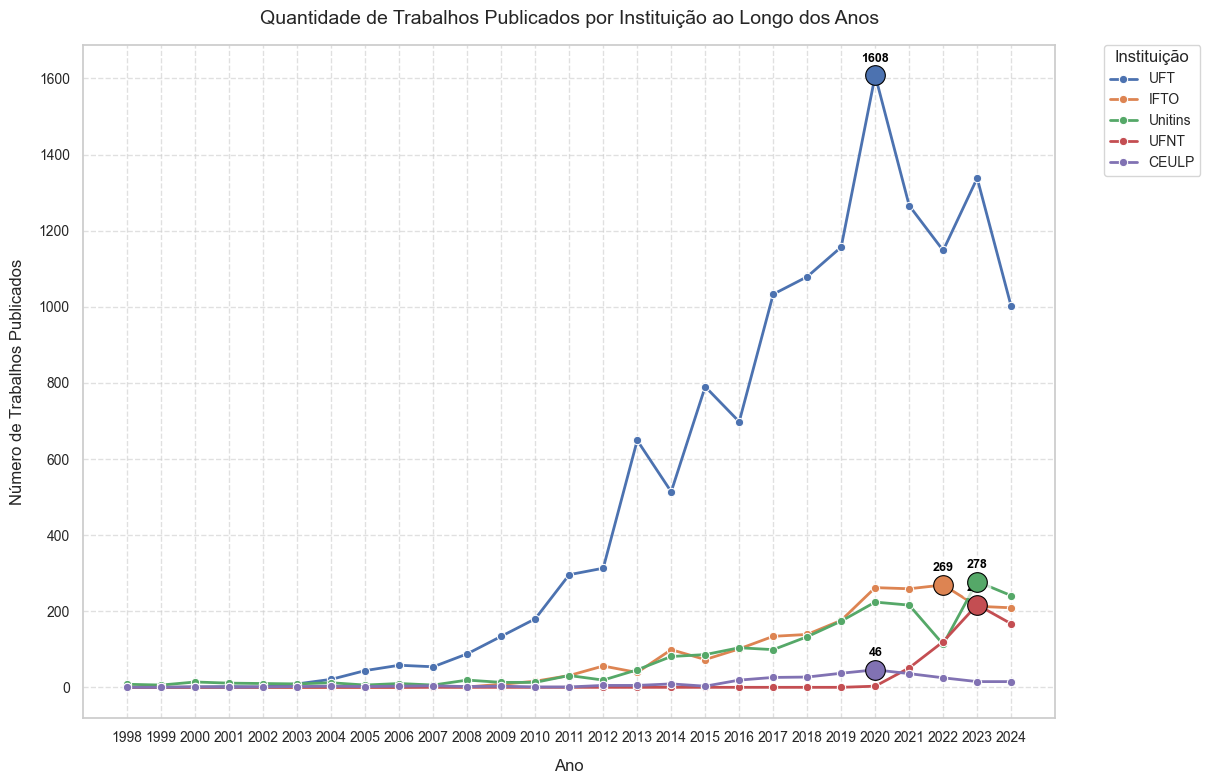

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# JSON data provided by the user

with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data).transpose()

# Ensure years are integers and reset index
df.columns = df.columns.astype(int)
df = df.reset_index().rename(columns={'index': 'Institution'})

# Calculate total works for each institution to sort them
df['TotalWorks'] = df.drop(columns='Institution').sum(axis=1)

# Sort institutions by total works in descending order
df_sorted = df.sort_values(by='TotalWorks', ascending=False)

# Melt the DataFrame to long format for easier plotting
df_melted = df_sorted.melt(id_vars=['Institution', 'TotalWorks'], var_name='Year', value_name='Works')

# Remove the 'TotalWorks' column from df_melted as it's no longer needed for plotting
df_melted = df_melted.drop(columns='TotalWorks')

# Identify the peak for each institution
peak_data = df_melted.loc[df_melted.groupby('Institution')['Works'].idxmax()]

# Set a seaborn style for scientific articles
sns.set_theme(style="whitegrid", palette="deep") # 'deep' or 'viridis' often work well

# Create the plot using seaborn
plt.figure(figsize=(14, 8)) # Increased figure size for better readability
line_plot = sns.lineplot(data=df_melted, x='Year', y='Works', hue='Institution', marker='o', errorbar=None, linewidth=2.0)

# Add markers and annotations for the peaks
for index, row in peak_data.iterrows():
    institution = row['Institution']
    year = row['Year']
    works = row['Works']

    # Get the color for the current institution from the line plot
    # This assumes the order of institutions in the legend matches the order in unique()
    institution_index = df_melted['Institution'].unique().tolist().index(institution)
    institution_color = line_plot.get_lines()[institution_index].get_color()

    # Add a larger scatter point for the peak
    plt.scatter(year, works, color=institution_color, s=200, zorder=5, edgecolor='black', linewidth=0.8)

    # Add text annotation for the number of works at the peak
    # Adjust vertical offset based on y-axis limit to avoid overlap with line
    text_offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02
    plt.text(year, works + text_offset,
             f'{works}',
             horizontalalignment='center',
             color='black',
             weight='bold',
             fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Customize the plot for scientific articles
plt.xlabel('Ano', fontsize=12, labelpad=10)
plt.ylabel('Número de Trabalhos Publicados', fontsize=12, labelpad=10)
plt.title('Quantidade de Trabalhos Publicados por Instituição ao Longo dos Anos', fontsize=14, pad=15)

# Show all years on the x-axis and keep them horizontal
years = sorted(df_melted['Year'].unique())
plt.xticks(years, fontsize=10)
plt.yticks(fontsize=10)

# Improve legend
plt.legend(title='Instituição', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust rect to make space for the legend

plt.show()

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

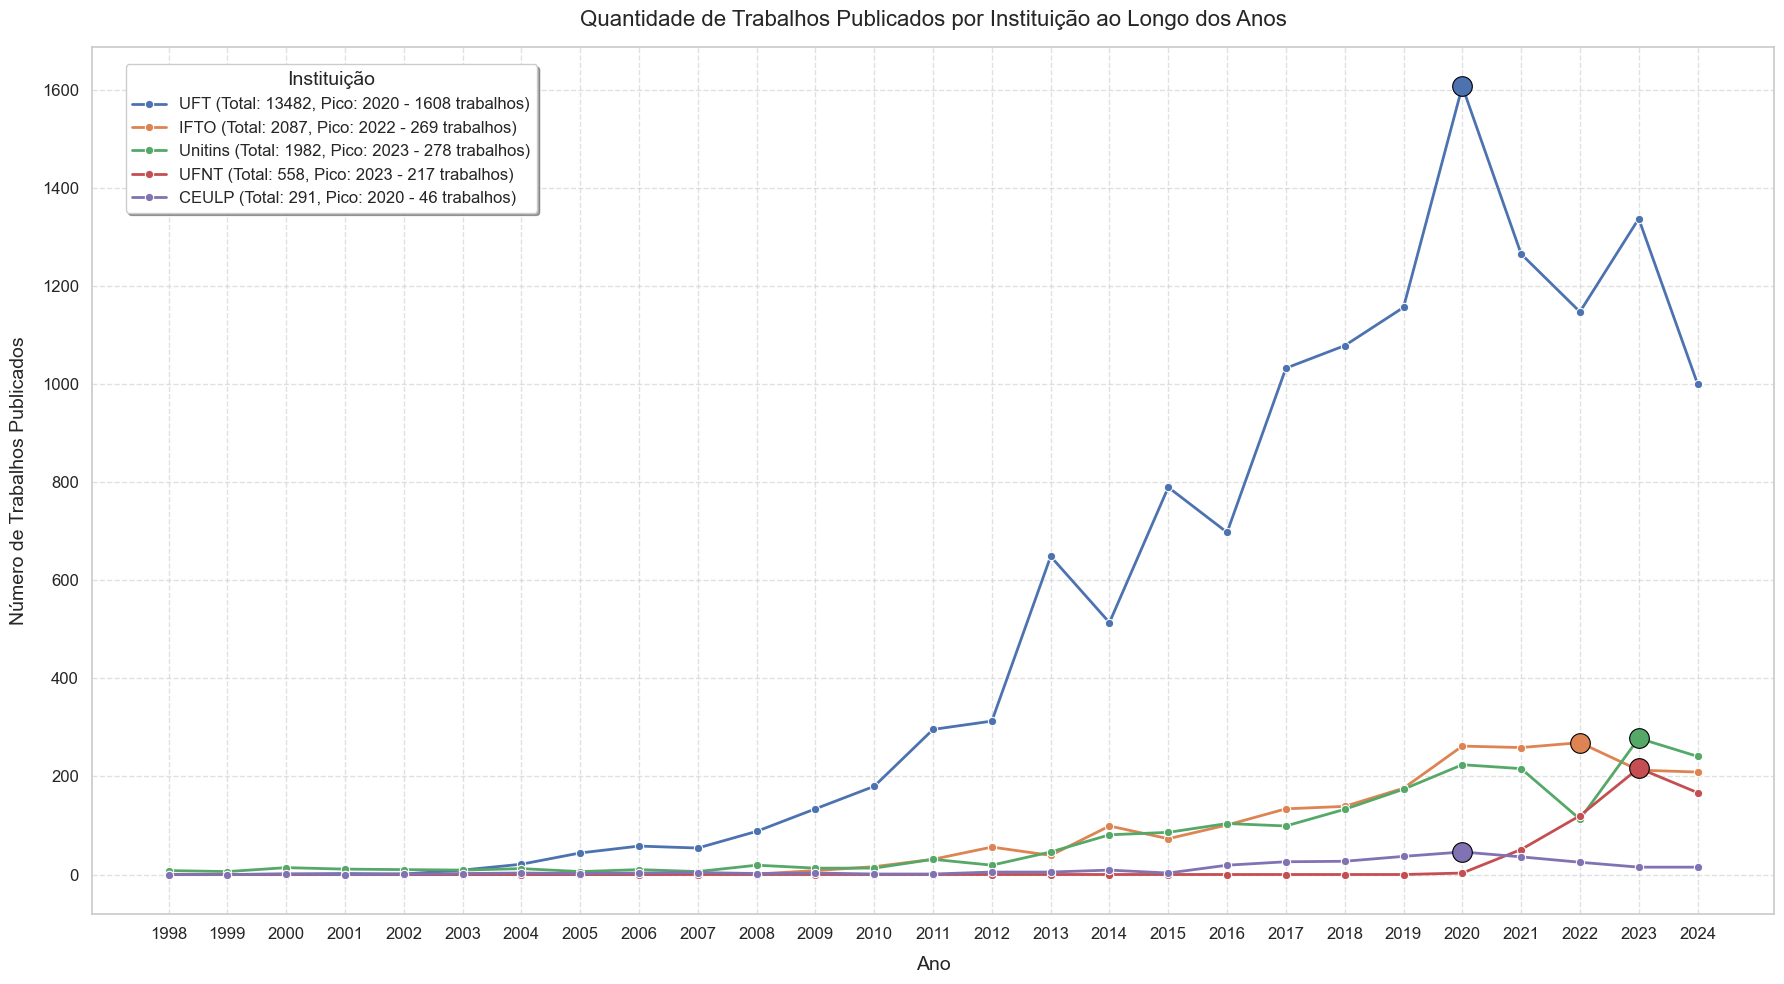

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data).transpose()

# Ensure years are integers and reset index
df.columns = df.columns.astype(int)
df = df.reset_index().rename(columns={'index': 'Institution'})

# Calculate total works for each institution to sort them
df['TotalWorks'] = df.drop(columns='Institution').sum(axis=1)

# Sort institutions by total works in descending order
df_sorted = df.sort_values(by='TotalWorks', ascending=False)

# Melt the DataFrame to long format for easier plotting
df_melted = df_sorted.melt(id_vars=['Institution', 'TotalWorks'], var_name='Year', value_name='Works')

# Remove the 'TotalWorks' column from df_melted as it's no longer needed for plotting
df_melted = df_melted.drop(columns='TotalWorks')

# Identify the peak for each institution
peak_data = df_melted.loc[df_melted.groupby('Institution')['Works'].idxmax()]
peak_data = peak_data.set_index('Institution') # Set 'Institution' as index for easier lookup

# Set a seaborn style for scientific articles
sns.set_theme(style="whitegrid", palette="deep")

# Create the plot using seaborn
plt.figure(figsize=(18, 10)) # Increased figure size for more spacing and clarity
line_plot = sns.lineplot(data=df_melted, x='Year', y='Works', hue='Institution', marker='o', errorbar=None, linewidth=2.0)

# Add only the scatter markers for the peaks (removed text annotations)
for index, row in peak_data.iterrows():
    institution = index
    year = row['Year']
    works = row['Works']

    # Get the color for the current institution from the line plot
    institution_index = df_melted['Institution'].unique().tolist().index(institution)
    institution_color = line_plot.get_lines()[institution_index].get_color()

    # Add a larger scatter point for the peak
    plt.scatter(year, works, color=institution_color, s=200, zorder=5, edgecolor='black', linewidth=0.8)

# Customize the plot for scientific articles
plt.xlabel('Ano', fontsize=14, labelpad=10)
plt.ylabel('Número de Trabalhos Publicados', fontsize=14, labelpad=10)
plt.title('Quantidade de Trabalhos Publicados por Instituição ao Longo dos Anos', fontsize=16, pad=15)

# Show all years on the x-axis and keep them horizontal
years = sorted(df_melted['Year'].unique())
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# Improve legend - custom handles and labels to include total works AND peak data
handles, labels = line_plot.get_legend_handles_labels()
new_labels = []

# Get total works for each institution from the original df_sorted for correct ordering
institution_total_works = df_sorted.set_index('Institution')['TotalWorks'].to_dict()

# Iterate through labels to construct new ones
for label in labels:
    total_works = institution_total_works.get(label, 'N/A')
    
    # Get peak data for the current institution
    peak_year = peak_data.loc[label]['Year']
    peak_works = peak_data.loc[label]['Works']
    
    new_labels.append(f'{label} (Total: {int(total_works)}, Pico: {int(peak_year)} - {int(peak_works)} trabalhos)')

# Place the legend inside the plot, at the upper left
plt.legend(handles, new_labels, title='Instituição', title_fontsize='14', fontsize='12',
           bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0., frameon=True, fancybox=True, shadow=True)


# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout() # Removed rect argument as legend is now inside

plt.show()

/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/joaopedronoronha/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

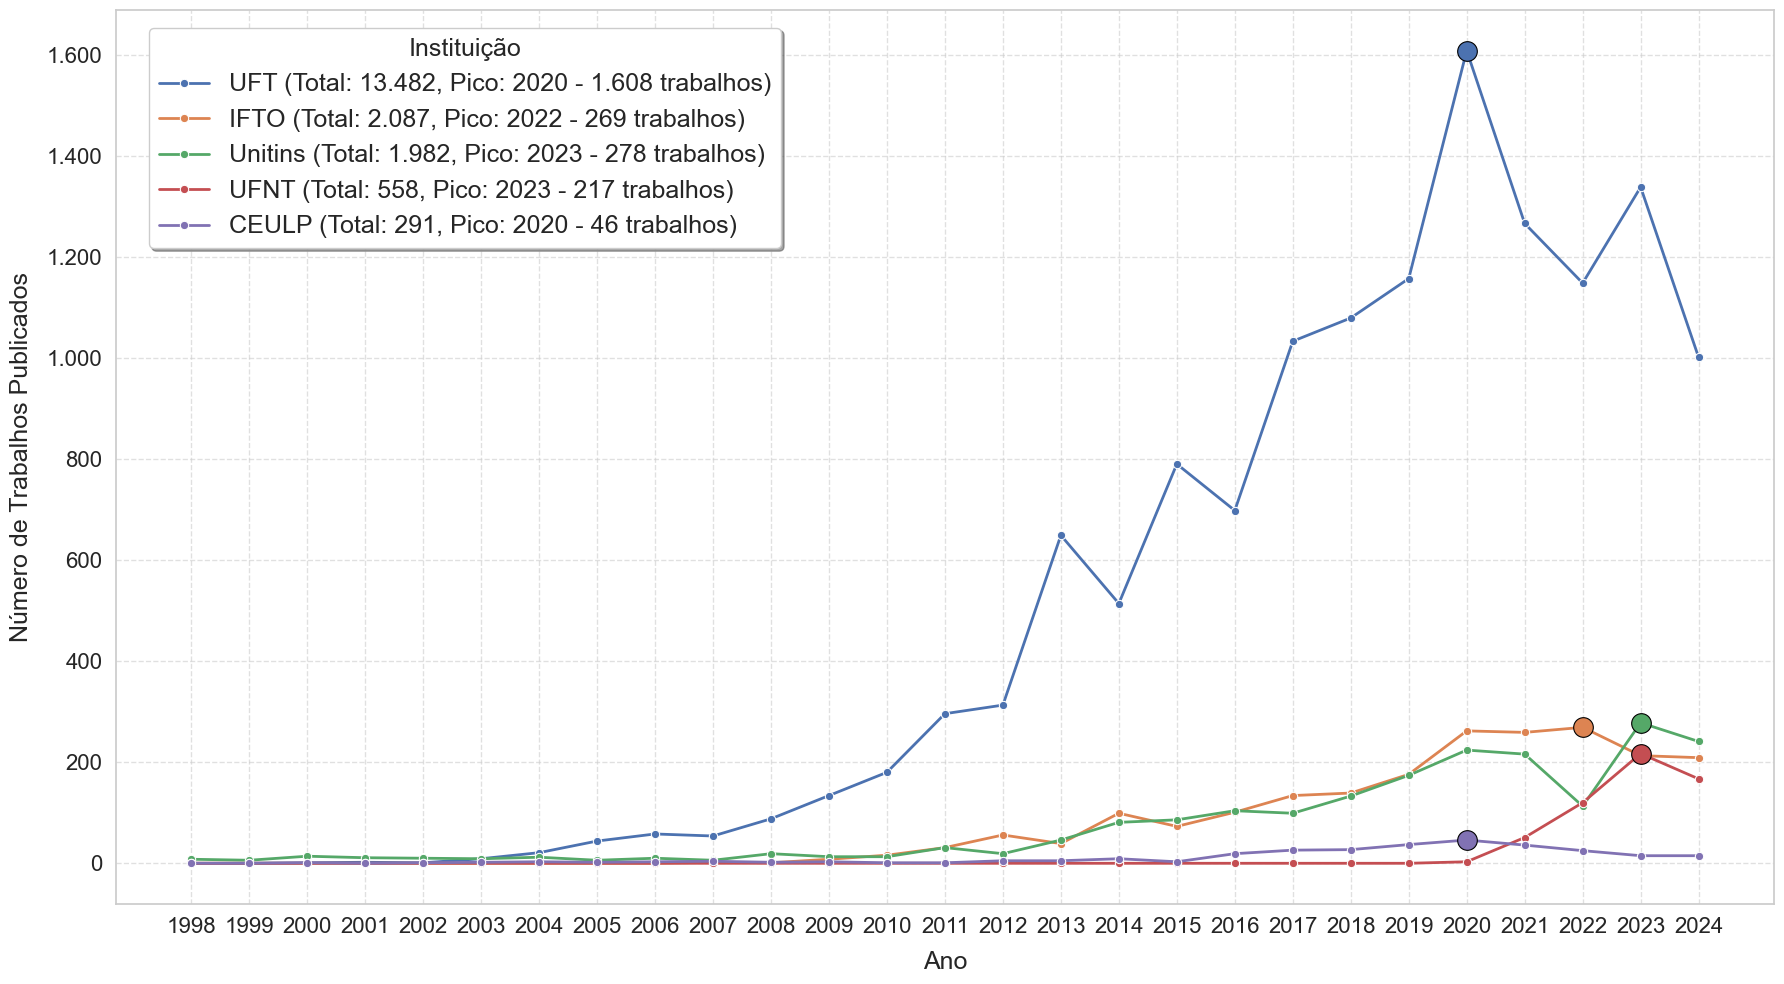

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

with open('../results/institutions_works_count_years.json', 'r') as f:
    data = json.load(f)

# Set font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Convert the data to a DataFrame
df = pd.DataFrame(data).transpose()

# Ensure years are integers and reset index
df.columns = df.columns.astype(int)
df = df.reset_index().rename(columns={'index': 'Institution'})

# Calculate total works for each institution to sort them
df['TotalWorks'] = df.drop(columns='Institution').sum(axis=1)

# Sort institutions by total works in descending order
df_sorted = df.sort_values(by='TotalWorks', ascending=False)

# Melt the DataFrame to long format for easier plotting
df_melted = df_sorted.melt(id_vars=['Institution', 'TotalWorks'], var_name='Year', value_name='Works')

# Remove the 'TotalWorks' column from df_melted as it's no longer needed for plotting
df_melted = df_melted.drop(columns='TotalWorks')

# Identify the peak for each institution
peak_data = df_melted.loc[df_melted.groupby('Institution')['Works'].idxmax()]
peak_data = peak_data.set_index('Institution') # Set 'Institution' as index for easier lookup

# Set a seaborn style for scientific articles
sns.set_theme(style="whitegrid", palette="deep")

# Create the plot using seaborn
plt.figure(figsize=(18, 10)) # Increased figure size for more spacing and clarity
line_plot = sns.lineplot(data=df_melted, x='Year', y='Works', hue='Institution', marker='o', errorbar=None, linewidth=2.0)

# Add only the scatter markers for the peaks (removed text annotations)
for index, row in peak_data.iterrows():
    institution = index
    year = row['Year']
    works = row['Works']

    # Get the color for the current institution from the line plot
    institution_index = df_melted['Institution'].unique().tolist().index(institution)
    institution_color = line_plot.get_lines()[institution_index].get_color()

    # Add a larger scatter point for the peak
    plt.scatter(year, works, color=institution_color, s=200, zorder=5, edgecolor='black', linewidth=0.8)

# Customize the plot for scientific articles
plt.xlabel('Ano', fontsize=18, labelpad=10)
plt.ylabel('Número de Trabalhos Publicados', fontsize=18, labelpad=10)
# Removed plt.title() as requested

# Show all years on the x-axis and keep them horizontal
years = sorted(df_melted['Year'].unique())
plt.xticks(years, fontsize=16)
plt.yticks(fontsize=16)

# Function to format numbers with dot as thousand separator
def format_thousands(x, pos):
    return f'{int(x):,}'.replace(',', '.')

# Apply formatter to y-axis tick labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Improve legend - custom handles and labels to include total works AND peak data
handles, labels = line_plot.get_legend_handles_labels()
new_labels = []

# Get total works for each institution from the original df_sorted for correct ordering
institution_total_works = df_sorted.set_index('Institution')['TotalWorks'].to_dict()

# Iterate through labels to construct new ones
for label in labels:
    total_works = institution_total_works.get(label, 'N/A')
    
    # Get peak data for the current institution
    peak_year = peak_data.loc[label]['Year']
    peak_works = peak_data.loc[label]['Works']
    
    # Format numbers with dot as thousand separator
    formatted_total_works = f'{int(total_works):,}'.replace(',', '.')
    formatted_peak_works = f'{int(peak_works):,}'.replace(',', '.')
    
    new_labels.append(f'{label} (Total: {formatted_total_works}, Pico: {int(peak_year)} - {formatted_peak_works} trabalhos)')

# Place the legend inside the plot, at the upper left
plt.legend(handles, new_labels, title='Instituição', title_fontsize='18', fontsize='18', # Increased legend font size
           bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0., frameon=True, fancybox=True, shadow=True)


# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout() # Removed rect argument as legend is now inside

plt.savefig('../results/img/grafico_trabalhos_instituicoes.png', dpi=300, bbox_inches='tight')

plt.show()